In [42]:
# pip install ta

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import math
import ta

from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator
from ta.volatility import AverageTrueRange
from ta.volume import VolumeWeightedAveragePrice
from ta.trend import ADXIndicator

In [88]:
stock_symbol = "AAPL"
start = "2022-01-01"
end = "2022-06-29"
period = "1y"

In [89]:
stock_data = yf.Ticker(stock_symbol)
hist_stock = stock_data.history(start=start, end=end)
hist_stock = hist_stock.fillna(method='ffill')
# hist_stock["Close"].plot()

In [90]:
# Calculate RSI (Relative Strength Index)
def RSI(data, window):
    rsi = RSIIndicator(data['Close'], window=window, fillna = False).rsi()
    return round(rsi, 1)

# Calculate SMA (Simple Moving Average)
def SimpleMovingAverage(data, window):
    sma = SMAIndicator(data['Close'], window=window, fillna = False).sma_indicator()
    return round(sma, 1)

# Calculate ATR (Average True Range)
def ATR(data, window):
    atr = AverageTrueRange(data['High'], data['Low'], data['Close'], window=window, fillna = False).average_true_range()
    return round(atr, 1)

# Calculate VWAP (Volume Weighted Average Price)
def VWAP(data, window):
    vwap = VolumeWeightedAveragePrice(data['High'], data['Low'], data['Close'], data['Volume'], window=window, fillna = False).volume_weighted_average_price()[-1]
    return round(vwap, 1)

# Calculate Trend using ADX (Average Directional Index)
def Trend(data, window):
    adx = ADXIndicator(data['High'], data['Low'], data['Close'], window=window, fillna = False)
    pos = adx.adx_pos()
    neg = adx.adx_neg()
    adx = adx.adx()
    return round(adx, 1), round(pos, 1), round(neg, 1)


/usr/local/lib/python3.9/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.9/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


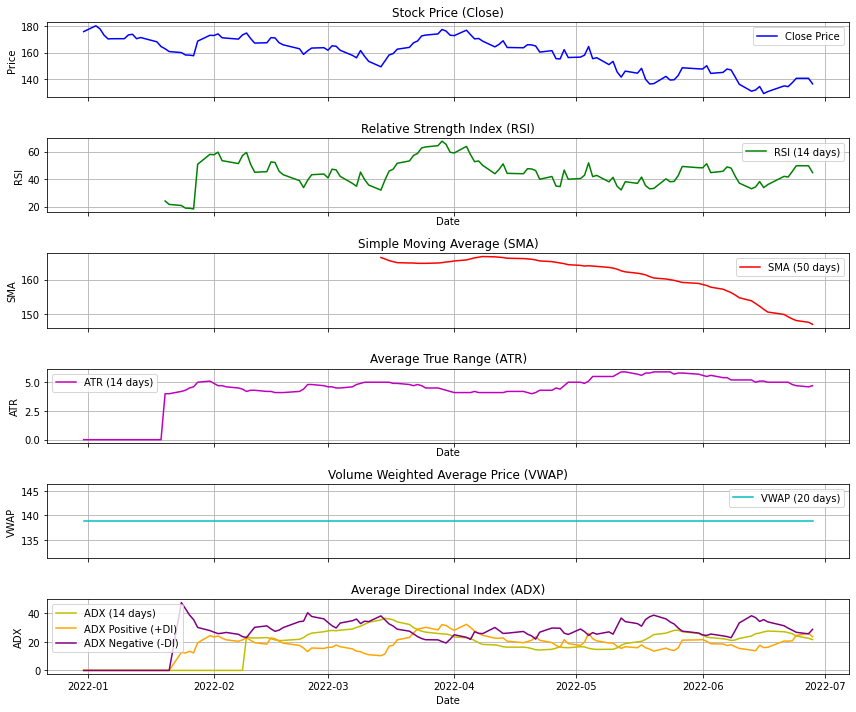

In [91]:
# Calculate the technical indicators
rsi_window = 14
sma_window = 50
atr_window = 14
vwap_window = 20
adx_window = 14

hist_stock['RSI'] = RSI(hist_stock, window=rsi_window)
hist_stock['SMA'] = SimpleMovingAverage(hist_stock, window=sma_window)
hist_stock['ATR'] = ATR(hist_stock, window=atr_window)
hist_stock['VWAP'] = VWAP(hist_stock, window=vwap_window)
adx, plus, neg = Trend(hist_stock, window=adx_window)
hist_stock['ADX'] = adx
hist_stock['ADX_Positive'] = plus
hist_stock['ADX_Negative'] = neg

# Create subplots for multiple visualizations
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 10), sharex=True)

# Plot the stock's closing price
axes[0].plot(hist_stock.index, hist_stock['Close'], label='Close Price', color='b')
axes[0].set_title('Stock Price (Close)')
axes[0].set_ylabel('Price')
axes[0].grid()

# Plot the RSI
axes[1].plot(hist_stock.index, hist_stock['RSI'], label=f'RSI ({rsi_window} days)', color='g')
axes[1].set_title('Relative Strength Index (RSI)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('RSI')
axes[1].grid()

# Plot the SMA
axes[2].plot(hist_stock.index, hist_stock['SMA'], label=f'SMA ({sma_window} days)', color='r')
axes[2].set_title('Simple Moving Average (SMA)')
axes[2].set_ylabel('SMA')
axes[2].grid()

# Plot the ATR
axes[3].plot(hist_stock.index, hist_stock['ATR'], label=f'ATR ({atr_window} days)', color='m')
axes[3].set_title('Average True Range (ATR)')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('ATR')
axes[3].grid()

# Plot the VWAP
axes[4].plot(hist_stock.index, hist_stock['VWAP'], label=f'VWAP ({vwap_window} days)', color='c')
axes[4].set_title('Volume Weighted Average Price (VWAP)')
axes[4].set_ylabel('VWAP')
axes[4].grid()

# Plot the ADX
axes[5].plot(hist_stock.index, hist_stock['ADX'], label=f'ADX ({adx_window} days)', color='y')
axes[5].plot(hist_stock.index, hist_stock['ADX_Positive'], label='ADX Positive (+DI)', color='orange')
axes[5].plot(hist_stock.index, hist_stock['ADX_Negative'], label='ADX Negative (-DI)', color='purple')
axes[5].set_title('Average Directional Index (ADX)')
axes[5].set_xlabel('Date')
axes[5].set_ylabel('ADX')
axes[5].grid()

# Add legends
for ax in axes:
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()